In [1]:
# # Configuration for JupyterLab
# %config IPCompleter.greedy=True

# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB

#Ignore Convergence warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Convert the csv to a dataframe
data = pd.read_csv('results.csv', encoding='ISO-8859-1', delimiter=';')
print(data.head)

<bound method NDFrame.head of           id  age  capital_gain  capital_loss  hours_week  over_50k  \
0          1   39          2174             0          40         0   
1          2   50             0             0          13         0   
2          3   38             0             0          40         0   
3          4   53             0             0          40         0   
4          5   28             0             0          40         0   
5          6   37             0             0          40         0   
6          7   49             0             0          16         0   
7          8   52             0             0          45         1   
8          9   31         14084             0          50         1   
9         10   42          5178             0          40         1   
10        11   37             0             0          80         1   
11        12   30             0             0          40         1   
12        13   23             0             0  

In [3]:
#Numerical Data Analysis
print(data.describe())

                 id           age  capital_gain  capital_loss    hours_week  \
count  48842.000000  48842.000000  48842.000000  48842.000000  48842.000000   
mean   24421.500000     38.643585   1079.067626     87.502314     40.422382   
std    14099.615261     13.710510   7452.019058    403.004552     12.391444   
min        1.000000     17.000000      0.000000      0.000000      1.000000   
25%    12211.250000     28.000000      0.000000      0.000000     40.000000   
50%    24421.500000     37.000000      0.000000      0.000000     40.000000   
75%    36631.750000     48.000000      0.000000      0.000000     45.000000   
max    48842.000000     90.000000  99999.000000   4356.000000     99.000000   

           over_50k  
count  48842.000000  
mean       0.239282  
std        0.426649  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [4]:
#Categorical Data Analysis
print(data['over_50k'].value_counts(normalize=True))
print(data['country'].value_counts(normalize=True))
print(data['education_level'].value_counts(normalize=True))
print(data['marital_status'].value_counts(normalize=True))
print(data['occupation'].value_counts(normalize=True))
print(data['race'].value_counts(normalize=True))
print(data['relationship_status'].value_counts(normalize=True))
print(data['sex'].value_counts(normalize=True))

0    0.760718
1    0.239282
Name: over_50k, dtype: float64
United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran 

In [5]:
#Fix issues with United-States not converting properly
# data['country'] = data['country'].replace('United-States', 'US')

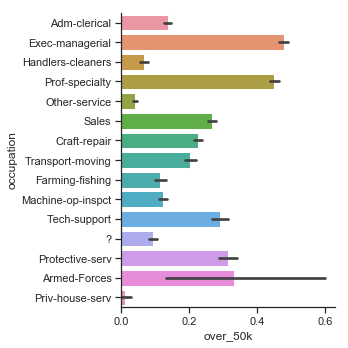

In [6]:
#Plot graph between occupation and over_50k
sns.set(style="ticks", color_codes=True)
sns.catplot(y="occupation", x="over_50k", data=data, kind="bar");

In [7]:
#Create dummy variables for categorical values
cat_vars=['country','education_level','marital_status','occupation','race','relationship_status','sex']
for var in cat_vars:
    cat_list='var' +'_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data=data.join(cat_list)
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data = data[to_keep]

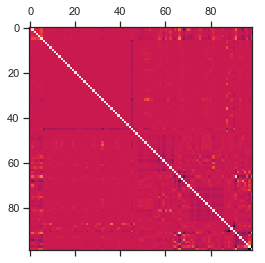

In [8]:
#Create a corrolation matrix
corrMatrix = data.corr()
plt.matshow(data.corr())
plt.show()

In [10]:
#Create testing/training split
os = SMOTE(random_state=0)
X = data.loc[:, data.columns != 'over_50k']
y = data.loc[:, data.columns == 'over_50k']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

In [11]:
# #Scale the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train) 
# X_test = scaler.transform(X_test)
# X_train

In [12]:
#Over-sample using smote to make up for differences in classes
smote_X, smote_y = os.fit_sample(X_train, y_train)
smote_X = pd.DataFrame(data=smote_X,columns=X_train.columns)
smote_y = pd.DataFrame(data=smote_y,columns=['over_50k'])

In [13]:
#Determine which features to use
logreg = LogisticRegression(max_iter=2000)
# rfe = RFE(logreg, 20)
# rfe = rfe.fit(smote_X, smote_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [14]:
#Determine top 5 features
rfe_5 = RFE(logreg, 5)
rfe_5 = rfe_5.fit(smote_X, smote_y.values.ravel())
print(rfe_5.support_)
print(rfe_5.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True  True False  True  True False False False False
 False False False False False False False False False False False False
 False False]
[94 88 93 92 86 69 50 89 54 30 77 51 55 58 91 79 75 84 49 76 90 80 61 87
 65 74 57 60 73 68 64 42 63 66 52 81 72 85 59 48 53 67 71 70 78 56 62 31
 28 32 24 29 26 27 36 35 37 39 33 38 25 40 34 21 82 83 22 19 20 23  1  3
 11  5 10  1  1  2  1  1  9  8  7  6  4 14 17 16 15 18 44 46 43 41 45 47
 12 13]


In [15]:
#Save selected features
def select_features(rfe):
    potential_features = rfe.support_
    cols = X_train.columns
    selected = []
    for i in range(potential_features.size):
        if potential_features[i] == True:
            selected.append(cols[i])
    return selected

# selected = select_features(rfe)
selected = select_features(rfe_5)
top_5 = select_features(rfe_5)
select_smote_X = smote_X[selected]
select_smote_y = smote_y
# select_smote_X

In [16]:
# #Plot the most important relationships
# for i in top_5:
# #     data.plot(y=i, x='over_50k', style='o')
# #     data.plot(y=i, x='over_50k', style='o',kind='bar')
# #     data.plot(y=i, x='over_50k', style='o',kind='line')
# #     data.plot(y=i, x='over_50k', style='o',kind='pie')
# # data.plot(x="over_50k", y=top_5, kind="bar")

In [17]:
#Train Logistic Regression and test on all features
logreg_all = LogisticRegression(max_iter=2000)
logreg_all.fit(smote_X, smote_y['over_50k'])
y_pred = logreg_all.predict(X_test)
print('Accuracy of Logistic Regression on all featutres: {:.2f}'.format(logreg_all.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression on all featutres: 0.80
[[7882 1474]
 [ 922 1933]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      9356
           1       0.57      0.68      0.62      2855

    accuracy                           0.80     12211
   macro avg       0.73      0.76      0.74     12211
weighted avg       0.82      0.80      0.81     12211



In [18]:
#Train Logistic Regression and test on selected features
logreg_select = LogisticRegression(max_iter=2000)
logreg_select.fit(smote_X, smote_y['over_50k'])
y_pred = logreg_select.predict(X_test)
print('Accuracy of Logistic Regression on select featutres: {:.2f}'.format(logreg_select.score(X_test, y_test)))
# confusion_matrix_select = confusion_matrix(y_test, y_pred)
# print(confusion_matrix_select)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression on select featutres: 0.80
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      9356
           1       0.57      0.68      0.62      2855

    accuracy                           0.80     12211
   macro avg       0.73      0.76      0.74     12211
weighted avg       0.82      0.80      0.81     12211



In [19]:
#Train Multi-layer Perceptron and test on all features
clf_all = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=0)
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Multi-layer Perceptron on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_1 = confusion_matrix(y_test, y_pred)
# print(cm_1)
print(classification_report(y_test, y_pred))

Accuracy of Multi-layer Perceptron on all featutres: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9356
           1       0.00      0.00      0.00      2855

    accuracy                           0.77     12211
   macro avg       0.38      0.50      0.43     12211
weighted avg       0.59      0.77      0.66     12211



In [20]:
#Train Multi-layer Perceptron and test on selected features
clf_select = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=0)
clf_select.fit(smote_X, smote_y['over_50k'])
y_pred = clf_select.predict(X_test)
print('Accuracy of Multi-layer Perceptron on select featutres: {:.2f}'.format(clf_select.score(X_test, y_test)))
# cm_2 = confusion_matrix(y_test, y_pred)
# print(cm_2)
print(classification_report(y_test, y_pred))

Accuracy of Multi-layer Perceptron on select featutres: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9356
           1       0.00      0.00      0.00      2855

    accuracy                           0.77     12211
   macro avg       0.38      0.50      0.43     12211
weighted avg       0.59      0.77      0.66     12211



In [21]:
#Train Multi-layer Perceptron with fewer layers
clf_all = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(2, 2), random_state=0)
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Multi-layer Perceptron with 2 layers on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_3 = confusion_matrix(y_test, y_pred)
# print(cm_3)
print(classification_report(y_test, y_pred))

Accuracy of Multi-layer Perceptron with 2 layers on all featutres: 0.23
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      9356
           1       0.23      1.00      0.38      2855

    accuracy                           0.23     12211
   macro avg       0.37      0.50      0.19     12211
weighted avg       0.44      0.23      0.09     12211



In [22]:
#Train Multi-layer Perceptron with more layers
clf_all = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 2), random_state=0)
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Multi-layer Perceptron on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_4 = confusion_matrix(y_test, y_pred)
# print(cm_4)
print(classification_report(y_test, y_pred))

Accuracy of Multi-layer Perceptron on all featutres: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9356
           1       0.00      0.00      0.00      2855

    accuracy                           0.77     12211
   macro avg       0.38      0.50      0.43     12211
weighted avg       0.59      0.77      0.66     12211



In [23]:
#Train Multi-layer Perceptron with fewer layers
clf_all = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 5), random_state=0)
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Multi-layer Perceptron on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_3 = confusion_matrix(y_test, y_pred)
# print(cm_3)
print(classification_report(y_test, y_pred))

Accuracy of Multi-layer Perceptron on all featutres: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9356
           1       0.00      0.00      0.00      2855

    accuracy                           0.77     12211
   macro avg       0.38      0.50      0.43     12211
weighted avg       0.59      0.77      0.66     12211



In [24]:
#Train Support Vector Classifier and test on all features
# clf_all = svm.SVC()
# clf_all.fit(smote_X, smote_y['over_50k'])
# y_pred = clf_all.predict(X_test)
# print('Accuracy of Support Vector Classifier on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# # cm_5 = confusion_matrix(y_test, y_pred)
# # print(cm_5)
# print(classification_report(y_test, y_pred))

In [25]:
#Train Support Vector Classifier and test on selected features
# clf_select = svm.SVC()
# clf_select.fit(smote_X, smote_y['over_50k'])
# y_pred = clf_select.predict(X_test)
# print('Accuracy of Support Vector Classifier on select featutres: {:.2f}'.format(clf_select.score(X_test, y_test)))
# # cm_6 = confusion_matrix(y_test, y_pred)
# # print(cm_6)
# print(classification_report(y_test, y_pred))

In [26]:
#Train Decision Tree and test on all features
clf_all = tree.DecisionTreeClassifier()
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Decision Tree on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_5 = confusion_matrix(y_test, y_pred)
# print(cm_5)
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree on all featutres: 0.81
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      9356
           1       0.58      0.61      0.60      2855

    accuracy                           0.81     12211
   macro avg       0.73      0.74      0.73     12211
weighted avg       0.81      0.81      0.81     12211



In [27]:
#Train Decision Tree and test on selected features
clf_select = tree.DecisionTreeClassifier()
clf_select.fit(smote_X, smote_y['over_50k'])
y_pred = clf_select.predict(X_test)
print('Accuracy of Decision Tree on select featutres: {:.2f}'.format(clf_select.score(X_test, y_test)))
# cm_6 = confusion_matrix(y_test, y_pred)
# print(cm_6)
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree on select featutres: 0.81
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9356
           1       0.58      0.62      0.60      2855

    accuracy                           0.81     12211
   macro avg       0.73      0.74      0.74     12211
weighted avg       0.81      0.81      0.81     12211



In [28]:
#Train Nearest Centroid Classifier and test on all features
clf_all = NearestCentroid()
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Nearest Centroid Classifier on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_5 = confusion_matrix(y_test, y_pred)
# print(cm_5)
print(classification_report(y_test, y_pred))

Accuracy of Nearest Centroid Classifier on all featutres: 0.79
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9356
           1       0.67      0.22      0.33      2855

    accuracy                           0.79     12211
   macro avg       0.73      0.59      0.60     12211
weighted avg       0.77      0.79      0.75     12211



In [29]:
#Train Nearest Centroid Classifier and test on selected features
clf_select = NearestCentroid()
clf_select.fit(smote_X, smote_y['over_50k'])
y_pred = clf_select.predict(X_test)
print('Accuracy of Nearest Centroid Classifier on select featutres: {:.2f}'.format(clf_select.score(X_test, y_test)))
# cm_6 = confusion_matrix(y_test, y_pred)
# print(cm_6)
print(classification_report(y_test, y_pred))

Accuracy of Nearest Centroid Classifier on select featutres: 0.79
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9356
           1       0.67      0.22      0.33      2855

    accuracy                           0.79     12211
   macro avg       0.73      0.59      0.60     12211
weighted avg       0.77      0.79      0.75     12211



In [30]:
#Train Naive Bayes Classifier and test on all features
clf_all = GaussianNB()
clf_all.fit(smote_X, smote_y['over_50k'])
y_pred = clf_all.predict(X_test)
print('Accuracy of Naive Bayes Classifier on all featutres: {:.2f}'.format(clf_all.score(X_test, y_test)))
# cm_7 = confusion_matrix(y_test, y_pred)
# print(cm_7)
print(classification_report(y_test, y_pred))

Accuracy of Naive Bayes Classifier on all featutres: 0.74
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      9356
           1       0.47      0.85      0.61      2855

    accuracy                           0.74     12211
   macro avg       0.71      0.78      0.71     12211
weighted avg       0.83      0.74      0.76     12211



In [31]:
#Train Naive Bayes Classifier and test on selected features
clf_select = GaussianNB()
clf_select.fit(smote_X, smote_y['over_50k'])
y_pred = clf_select.predict(X_test)
print('Accuracy of Naive Bayes Classifier on select featutres: {:.2f}'.format(clf_select.score(X_test, y_test)))
# cm_8 = confusion_matrix(y_test, y_pred)
# print(cm_8)
print(classification_report(y_test, y_pred))

Accuracy of Naive Bayes Classifier on select featutres: 0.74
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      9356
           1       0.47      0.85      0.61      2855

    accuracy                           0.74     12211
   macro avg       0.71      0.78      0.71     12211
weighted avg       0.83      0.74      0.76     12211

